How to find a reliable results of a stochastic algorithm? Remember the result differs for different runs of the algorithm....

One has to refer to statistical methods. First, the experiment must be repeated several times. Statistically correct would be to repeat the experiment as many times as possible, perhaps a minimum number would be 10 or better 30 times - people do 100 or even more....

Let us generate a random variable in order to get acquainted with proper processing of such results.


In [1]:
from numpy.random import normal
from numpy.random import randint
# define underlying distribution of results
mean = 60
stev = 10
results = normal(mean, stev, 1000)

for a in range(10):
  print(results[a])


56.557921912700145
63.95200837187341
56.16701984317085
54.63486109812054
60.22341575203959
56.25364189170308
43.95533661927516
67.60827323264726
76.42748951073152
61.973289142547024


Let us check the basic stats: 
* minimum and maximum, 
* mean, 
* variance (simplest measure of diversity)
* skewness (symmetry of the distribution function) 
* kurtosis (shape of the distribution function)


In [2]:
from numpy import mean
from numpy import std
from scipy import stats
from matplotlib import pyplot
# descriptive stats
print(stats.describe(results))


DescribeResult(nobs=1000, minmax=(25.555996372564323, 88.13960147647403), mean=60.23391206074062, variance=103.10745797391215, skewness=-0.050833176233242267, kurtosis=-0.1526640357079816)


And let us plot the boxplot. The box extends from the lower (median of the lower half of the data) to upper quartile (median of the upper half of the data) values of the data, with a line at the median. The whiskers extend from the box to show the range of the data. Flier points are those past the end of the whiskers.

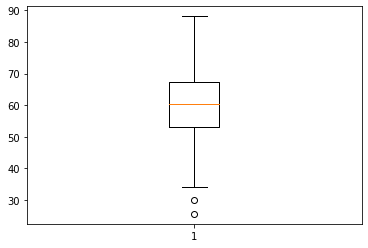

In [3]:
# box and whisker plot
pyplot.boxplot(results)
pyplot.show()

Of course you can proceed in such way step by step examining all the outputs of our algorithm, but we'd rather make it automatic. Repeating our computing experiment, we produce arrays of observations of the best values produced at certain amounts of time, let us simulate this and observe. First let us plot a standard plot with error bars, then let us do a box and whiskers plot.

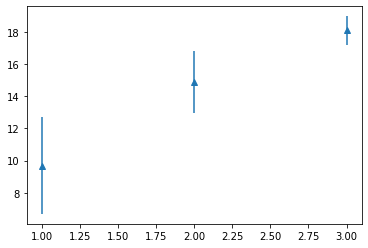

In [4]:
import statistics

res1 = normal(10, 3, 100)
res2 = normal(15, 2, 100)
res3 = normal(18, 1, 100)

avg1 = mean(res1)
std1 = statistics.stdev(res1)
avg2 = mean(res2)
std2 = statistics.stdev(res2)
avg3 = mean(res3)
std3 = statistics.stdev(res3)

pyplot.errorbar([1,2,3],[avg1,avg2,avg3],[std1,std2,std3],linestyle='None',marker='^')
pyplot.show()








But let us do the same, using this time Boxplot, in order to see much more than simply standard deviation.

<function matplotlib.pyplot.show(*args, **kw)>

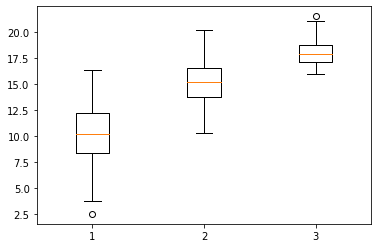

In [5]:
#from numpy.random import normal
# define underlying distribution of results
res1 = normal(10, 3, 100)
#print(res1)

res2 = normal(15, 2, 100)
res3 = normal(18, 1, 100)

pyplot.boxplot([res1,res2,res3])
pyplot.show

Let us further simulate the generation of results from many experiments. In this way you can visualize the repeated results of your computing experiment and compare with another algorithm (with different parameters). If the whiskers do not overlap - you can start to be convinced that one algorithm works "better" than another.

[16.47616514 11.59301414 10.94599157 13.20144527 12.58730416 13.93099628
  9.77219897 12.77377369 18.69255542 13.1382841 ]
[13.4023591  12.827629   10.56865011 12.75337531  9.26837397  8.11385531
 14.00914765  3.40559519 10.02156279 17.38347158]
[12.13453187 15.52153265 19.95780224 21.5203819  12.27223179 22.19860376
 19.17205236 17.79714729 17.32577044 17.53532185]
[13.76407948 12.51896096 12.14767582 10.52834191 11.60409621 12.421047
 11.21883821 11.18643825 13.42437963 13.25841607]
[ 8.6397117  10.27916225  9.56595126 12.28222068 11.24013532 11.5261607
 10.80390749 11.58005456 10.22508697 10.96693147]
[11.25568721 16.12356077 10.56653208  8.05215154 16.42615822 11.00822384
 15.87087246 13.45341951 15.15686553  9.48556611]
[11.41642208 10.74241823  9.72165398  9.9954949   9.26931067 10.69549112
 12.03816943 10.57555056 10.2746894  10.5686629 ]
[18.33410082 18.0836438   8.94241443 17.54288468 25.00351116 11.55178877
 13.30050455 14.08092075 21.40491023 13.28962469]
[12.06268643 10.168

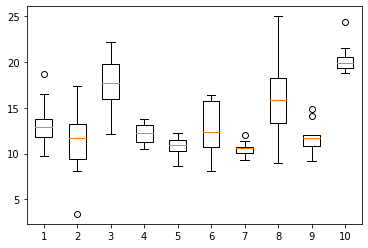

In [6]:
function_output=[]
for i in range(10):
  current_mean = randint(10,20)
  current_stdev = randint(1,5)
  resi = normal(current_mean, current_stdev, 10)
  print(resi)
  function_output.append(resi)
pyplot.boxplot(function_output)
pyplot.show()

Let us come back for a moment to observation of single random variables (e.g. the final values of your experiment)... We got two variables - which one is better (they are results of optimization, say - minimization just like up to now). Of course you can compare the whiskers... but there's a better way to follow.

<function matplotlib.pyplot.show(*args, **kw)>

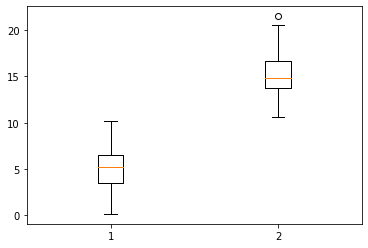

In [7]:
first = normal(5,2,100)
second = normal(15,2,100)

pyplot.boxplot((first,second))
pyplot.show

We can use statistical hypothesis testing. A statistical hypothesis, sometimes called confirmatory data analysis, is a hypothesis that is testable on the basis of observing a process that is modeled via a set of random variables.

We use predefined statistical tests (like e.g. Kruskall Wallis) to exclude the null hypothesis (that the two random distributions of the tested variables are the same). First we assume a certain significance threshold, close to zero (usually 0.05) and we run the test comparing the random variables.

In [8]:
stats.kruskal(first,second)

KruskalResult(statistic=149.25373134328356, pvalue=2.523939423990366e-34)

Such results are really convincing from the statistical point of view. Remember, first the significance threshold should be assumed, then the hypothesis testing should be realized. 

Now what happens if we want to compare more than two random variables? E.g. we have four results of the same experiment and we want to know if they are truly different.

Below you will find an implementation of Dunn's test - extension of Kruskall-Wallis for multiple random variables (copy of code from scipy.posthoc). You dont have to modify the code, move to the next code cell and let us check the results of the test in a similar way as in the case of Kruskal Wallis.....

In [9]:
import numpy as np
import scipy.stats as ss
import itertools as it
from statsmodels.sandbox.stats.multicomp import multipletests
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.libqsturng import psturng
from pandas import DataFrame, Categorical


def __convert_to_df(a, val_col=None, group_col=None, val_id=None, group_id=None):

    '''Hidden helper method to create a DataFrame with input data for further
    processing.
    Parameters
    ----------
    a : array_like or pandas DataFrame object
        An array, any object exposing the array interface or a pandas DataFrame.
        Array must be two-dimensional. Second dimension may vary,
        i.e. groups may have different lengths.
    val_col : str, optional
        Name of a DataFrame column that contains dependent variable values (test
        or response variable). Values should have a non-nominal scale. Must be
        specified if `a` is a pandas DataFrame object.
    group_col : str, optional
        Name of a DataFrame column that contains independent variable values
        (grouping or predictor variable). Values should have a nominal scale
        (categorical). Must be specified if `a` is a pandas DataFrame object.
    val_id : int, optional
        Index of a column that contains dependent variable values (test or
        response variable). Should be specified if a NumPy ndarray is used as an
        input. It will be inferred from data, if not specified.
    group_id : int, optional
        Index of a column that contains independent variable values (grouping or
        predictor variable). Should be specified if a NumPy ndarray is used as
        an input. It will be inferred from data, if not specified.
    Returns
    -------
    x : pandas DataFrame
        DataFrame with input data, `val_col` column contains numerical values and
        `group_col` column contains categorical values.
    val_col : str
        Name of a DataFrame column that contains dependent variable values (test
        or response variable).
    group_col : str
        Name of a DataFrame column that contains independent variable values
        (grouping or predictor variable).
    Notes
    -----
    Inferrence algorithm for determining `val_id` and `group_id` args is rather
    simple, so it is better to specify them explicitly to prevent errors.
    '''

    if not group_col:
        group_col = 'groups'
    if not val_col:
        val_col = 'vals'

    if isinstance(a, DataFrame):
        x = a.copy()
        if not {group_col, val_col}.issubset(a.columns):
            raise ValueError('Specify correct column names using `group_col` and `val_col` args')
        return x, val_col, group_col

    elif isinstance(a, list) or (isinstance(a, np.ndarray) and not a.shape.count(2)):
        grps_len = map(len, a)
        grps = list(it.chain(*[[i+1] * l for i, l in enumerate(grps_len)]))
        vals = list(it.chain(*a))

        return DataFrame({val_col: vals, group_col: grps}), val_col, group_col

    elif isinstance(a, np.ndarray):

        # cols ids not defined
        # trying to infer
        if not(all([val_id, group_id])):

            if np.argmax(a.shape):
                a = a.T

            ax = [np.unique(a[:, 0]).size, np.unique(a[:, 1]).size]

            if np.diff(ax).item():
                __val_col = np.argmax(ax)
                __group_col = np.argmin(ax)
            else:
                raise ValueError('Cannot infer input format.\nPlease specify `val_id` and `group_id` args')

            cols = {__val_col: val_col,
                    __group_col: group_col}
        else:
            cols = {val_id: val_col,
                    group_id: group_col}

        cols_vals = dict(sorted(cols.items())).values()
        return DataFrame(a, columns=cols_vals), val_col, group_col




def posthoc_dunn(a, val_col=None, group_col=None, p_adjust=None, sort=True):

    '''Post hoc pairwise test for multiple comparisons of mean rank sums
    (Dunn's test). May be used after Kruskal-Wallis one-way analysis of
    variance by ranks to do pairwise comparisons [1]_, [2]_.
    Parameters
    ----------
    a : array_like or pandas DataFrame object
        An array, any object exposing the array interface or a pandas DataFrame.
        Array must be two-dimensional. Second dimension may vary,
        i.e. groups may have different lengths.
    val_col : str, optional
        Name of a DataFrame column that contains dependent variable values (test
        or response variable). Values should have a non-nominal scale. Must be
        specified if `a` is a pandas DataFrame object.
    group_col : str, optional
        Name of a DataFrame column that contains independent variable values
        (grouping or predictor variable). Values should have a nominal scale
        (categorical). Must be specified if `a` is a pandas DataFrame object.
    p_adjust : str, optional
        Method for adjusting p values. See `statsmodels.sandbox.stats.multicomp`
        for details. Available methods are:
        'bonferroni' : one-step correction
        'sidak' : one-step correction
        'holm-sidak' : step-down method using Sidak adjustments
        'holm' : step-down method using Bonferroni adjustments
        'simes-hochberg' : step-up method  (independent)
        'hommel' : closed method based on Simes tests (non-negative)
        'fdr_bh' : Benjamini/Hochberg  (non-negative)
        'fdr_by' : Benjamini/Yekutieli (negative)
        'fdr_tsbh' : two stage fdr correction (non-negative)
        'fdr_tsbky' : two stage fdr correction (non-negative)
    sort : bool, optional
        Specifies whether to sort DataFrame by group_col or not. Recommended
        unless you sort your data manually.
    Returns
    -------
    result : pandas DataFrame
        P values.
    Notes
    -----
    A tie correction will be employed according to Glantz (2012).
    References
    ----------
    .. [1] O.J. Dunn (1964). Multiple comparisons using rank sums.
        Technometrics, 6, 241-252.
    .. [2] S.A. Glantz (2012), Primer of Biostatistics. New York: McGraw Hill.
    Examples
    --------
    >>> x = [[1,2,3,5,1], [12,31,54, np.nan], [10,12,6,74,11]]
    >>> sp.posthoc_dunn(x, p_adjust = 'holm')
    '''

    def compare_dunn(i, j):
        diff = np.abs(x_ranks_avg.loc[i] - x_ranks_avg.loc[j])
        A = n * (n + 1.) / 12.
        B = (1. / x_lens.loc[i] + 1. / x_lens.loc[j])
        z_value = diff / np.sqrt((A - x_ties) * B)
        p_value = 2. * ss.norm.sf(np.abs(z_value))
        return p_value

    x, _val_col, _group_col = __convert_to_df(a, val_col, group_col)

    if not sort:
        x[_group_col] = Categorical(x[_group_col], categories=x[_group_col].unique(), ordered=True)

    x.sort_values(by=[_group_col, _val_col], ascending=True, inplace=True)
    n = len(x.index)
    x_groups_unique = np.unique(x[_group_col])
    x_len = x_groups_unique.size
    x_lens = x.groupby(_group_col)[_val_col].count()

    x['ranks'] = x[_val_col].rank()
    x_ranks_avg = x.groupby(_group_col)['ranks'].mean()

    # ties
    vals = x.groupby('ranks').count()[_val_col].values
    tie_sum = np.sum(vals[vals != 1] ** 3 - vals[vals != 1])
    tie_sum = 0 if not tie_sum else tie_sum
    x_ties = tie_sum / (12. * (n - 1))

    vs = np.zeros((x_len, x_len))
    combs = it.combinations(range(x_len), 2)

    tri_upper = np.triu_indices(vs.shape[0], 1)
    tri_lower = np.tril_indices(vs.shape[0], -1)
    vs[:,:] = 0

    for i,j in combs:
        vs[i, j] = compare_dunn(x_groups_unique[i], x_groups_unique[j])

    if p_adjust:
        vs[tri_upper] = multipletests(vs[tri_upper], method = p_adjust)[1]

    vs[tri_lower] = vs.T[tri_lower]
    np.fill_diagonal(vs, -1)
    return DataFrame(vs, index=x_groups_unique, columns=x_groups_unique)




Here goes the visualization of the results, and the Dunn's test (let us asume again that the significance threshold is 0.05:

,1,2,3
1,-1.000000e+00,1.503201e-34,8.093372e-01
2,1.503201e-34,-1.000000e+00,1.952657e-33
3,8.093372e-01,1.952657e-33,-1.000000e+00


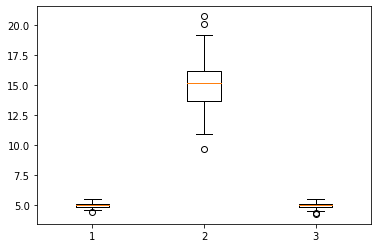

In [10]:
first = normal(5,0.2,100)
second = normal(15,2,100)
third = normal(5,0.2,100)

pyplot.boxplot((first,second,third))
pyplot.show


posthoc_dunn([first,second,third], p_adjust = 'holm')

Finally the agenda:


*   Run one experiment, an optimization of Rastrigin function, 10 dimensions, 100 steps.
*   Repeat the experiment 10 times and draw a standard-deviation (error bar) plot.
*   Do the same with box and whiskers plot.
*   Change a selected parameter (say, the mutation probability or mutation range). Repeat the experiment 10 times.
*   Visualize both experiments on the same plot. Are they different? Which is better?
*   Pick the final values produced by the experiments and use the Kruskall Wallis test to check if they are different.
*   Add the third experiment and use the Dunn's test to check if they are different.



# Population

In [12]:
import random
import numpy as np
import sys
import math

def create_starting_population(individuals, chromosome_length, hypercube_size):
    # Set up an initial array of all zeros
    population = np.zeros((individuals, chromosome_length))
    # Loop through each row (individual)
    for i in range(individuals):
        for j in range(chromosome_length):
          population[i,j]=random.uniform(-hypercube_size,hypercube_size)    
    return population

# Rastrigin fitenss function

In [14]:
def calculate_fitness_rastrigin(population):
    fitness_scores = np.zeros(len(population))
    for i in range(len(population)):
      current_fitness = 10 * len(population[i])
      for j in range(len(population[i])):
        current_fitness += population[i,j] * population[i,j] - 10 * math.cos(2*math.pi* population[i,j])        
      fitness_scores[i]=current_fitness
    return fitness_scores

# Selection

In [15]:
def select_individual_by_tournament(population, scores):
    # Get population size
    population_size = len(scores)
    
    # Pick individuals for tournament
    fighter_1 = random.randint(0, population_size-1)
    fighter_2 = random.randint(0, population_size-1)
    
    # Get fitness score for each
    fighter_1_fitness = scores[fighter_1]
    fighter_2_fitness = scores[fighter_2]
    
    # Identify undividual with highest fitness
    # Fighter 1 will win if score are equal
    if fighter_1_fitness <= fighter_2_fitness:
        winner = fighter_1
    else:
        winner = fighter_2
    
    # Return the chromosome of the winner
    return population[winner, :]

# Crossover method

In [16]:
def breed_by_discrete(parent_1, parent_2):
    # Get length of chromosome
    chromosome_length = len(parent_1)
    
    child_1 = []
    child_2 = []

    for i in range(chromosome_length):
      if random.uniform(0,1)<0.5:
        child_1.append(parent_1[i])
        child_2.append(parent_2[i])
      else:
        child_2.append(parent_1[i])
        child_1.append(parent_2[i])

    # Return children
    return child_1, child_2

# Mutation

In [18]:
def randomly_mutate_gaussian(population, mutation_probability, mutation_range):
    
    # Apply random mutation      
        for i in range(len(population)):
          for j in range(len(population[1])):
            if random.uniform(0,1) < mutation_probability:
              population[i,j] = random.gauss(population[i,j],mutation_range)

        # Return mutation population
        return population

# Whole evolution algo

In [47]:
def run_evolution_algo(chromosome_length, hypercube_size, population_size, maximum_generation, mutation_probability, mutation_range):
    best_score_progress = [] # Tracks progress
    final_scores = []

    for reptetition in range(10):
        # Set up and score population
        population = create_starting_population(population_size, chromosome_length, hypercube_size)

        # Display best score in starting population
        scores = calculate_fitness_rastrigin(population)
        best_score = np.min(scores)

        # Add starting best score to progress tracker
        best_score_progress.append(best_score)


        # Now we'll go through the generations of genetic algorithm
        for generation in range(maximum_generation):
          # Create an empty list for new population
          new_population = []


          # Create new popualtion generating two children at a time
          for i in range(int(population_size/2)):
              parent_1 = select_individual_by_tournament(population, scores)
              parent_2 = select_individual_by_tournament(population, scores)
              child_1, child_2 = breed_by_discrete(parent_1, parent_2)
              new_population.append(child_1)
              new_population.append(child_2)

          # Replace the old population with the new one
          population = np.array(new_population)

          # Apply mutation
          population = randomly_mutate_gaussian(population, mutation_probability, mutation_range)

          # Score best solution, and add to tracker
          #scores = calculate_fitness(population)
          scores = calculate_fitness_rastrigin(population)
          best_score = np.min(scores)
          best_score_progress.append(best_score)

        final_scores.append(scores)
    return final_scores

# Barplot

In [48]:
def show_barplot(final_scores):
    avg = []
    std = []

    for i in range(len(final_scores)):
        avg.append(mean(final_scores[i]))
        std.append(statistics.stdev(final_scores[i]))

    pyplot.errorbar(range(len(final_scores)),avg,std,linestyle='None',marker='^')
    pyplot.show()

# Boxplot

In [49]:
def show_boxplot(final_scores):
    pyplot.boxplot(final_scores)
    pyplot.show

# First attempt

In [50]:
chromosome_length = 10
hypercube_size = 5.12
population_size = 100 # this number must be even
maximum_generation = 10
mutation_probability = 0.25
mutation_range = 0.01

final_scores = run_evolution_algo(chromosome_length, hypercube_size, population_size, maximum_generation, mutation_probability, mutation_range)

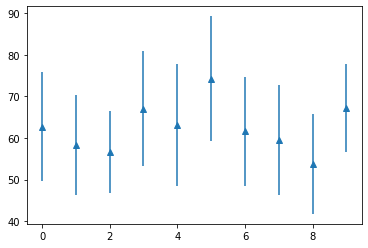

In [51]:
show_barplot(final_scores)

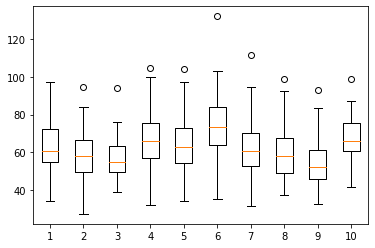

In [52]:
show_boxplot(final_scores)

# Second attempt

In [53]:
chromosome_length = 10
hypercube_size = 5.12
population_size = 100 # this number must be even
maximum_generation = 10
mutation_probability = 0.25
mutation_range = 0.005

final_scores = run_evolution_algo(chromosome_length, hypercube_size, population_size, maximum_generation, mutation_probability, mutation_range)

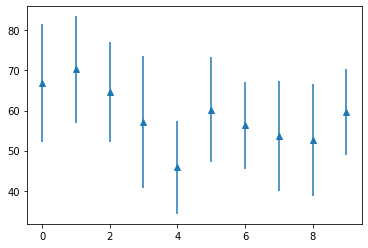

In [54]:
show_barplot(final_scores)

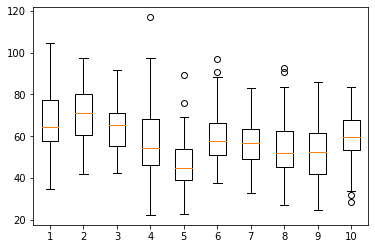

In [55]:
show_boxplot(final_scores)

Based on the plots we can say that mutation_range = 0.01 parameters from first attempt was better.

# Kruskall Wallis test

In [59]:
stats.kruskal(final_scores[0], final_scores[1])

KruskalResult(statistic=3.1380597014925797, pvalue=0.07648474661109927)

# Dunn's test

In [60]:
posthoc_dunn([final_scores[0], final_scores[1], final_scores[2]], p_adjust = 'holm')

,1,2,3
1,-1.000000,0.116348,0.329607
2,0.116348,-1.000000,0.012342
3,0.329607,0.012342,-1.000000
